In [1]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import geoviews as gv
from geoviews import opts
import pandas as pd
import panel as pn
import seaborn as sns
import os
from panel.template import BootstrapTemplate

pn.extension()
gv.extension('bokeh')

# Create directories for output if they don't exist
os.makedirs("Output", exist_ok=True)
os.makedirs("HTML", exist_ok=True)

In [2]:
# Load the CSV file into a Pandas DataFrame
ufo_data = pd.read_csv("Resources/UFO_data.csv")

In [3]:
# Display column names to verify structure
print("Columns in dataset:", ufo_data.columns)

Columns in dataset: Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


In [4]:
# Remove non-US sightings
ufo_data = ufo_data[ufo_data['country'] == 'us']

# Ensure 'datetime' is in datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

# Extract 'year' from 'datetime' and filter to include only sightings from 1947 onward
ufo_data['year'] = ufo_data['datetime'].dt.year
ufo_data = ufo_data[ufo_data['year'] >= 1947]

# Define function to save charts to 'Output' folder
def save_chart(fig, filename):
    fig.savefig(f"Output/{filename}", bbox_inches='tight')


### How have UFO sighting frequencies changed over the years, and are there noticable monthly or seasonal patterns?

In [5]:
# Ensure 'images' folder exists
if not os.path.exists('images'):
    os.makedirs('images')

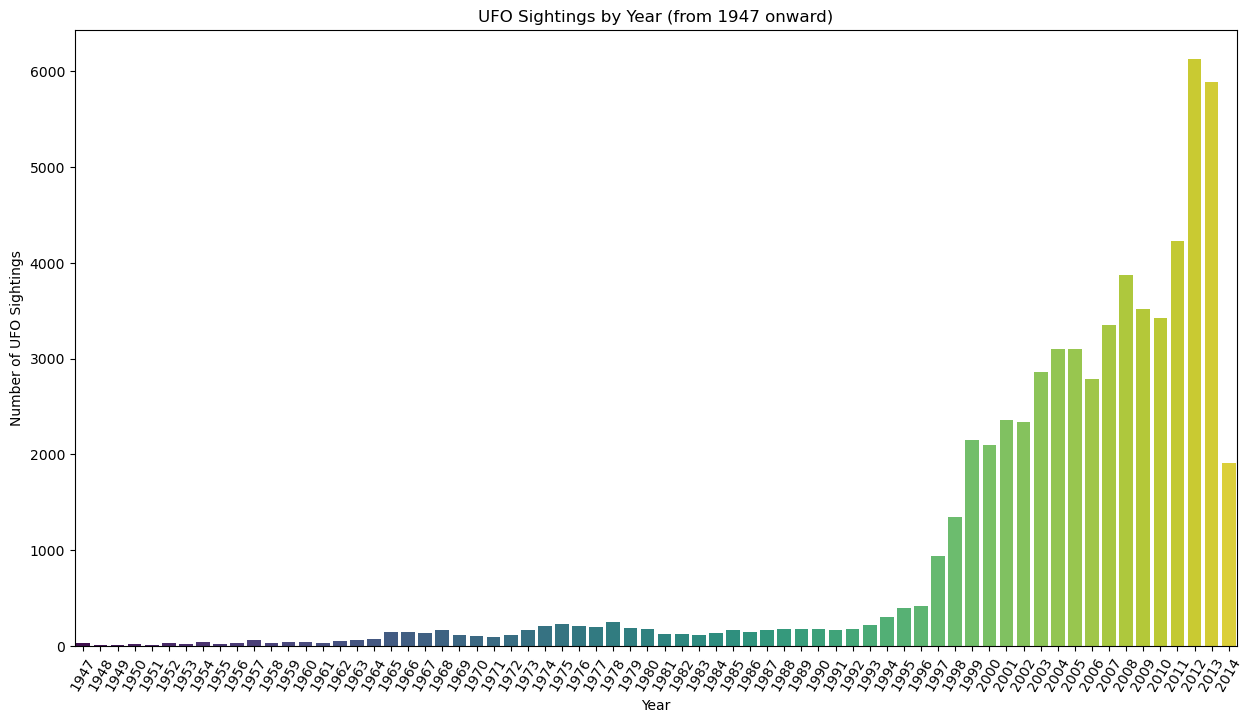

In [6]:
# 1. Bar Chart: Sightings per Year
years_data = ufo_data['year'].value_counts().sort_index()
plt.figure(figsize=(15, 8))
sns.barplot(x=years_data.index.astype(int), y=years_data.values, palette="viridis")
plt.title('UFO Sightings by Year (from 1947 onward)')
plt.xlabel('Year')
plt.ylabel('Number of UFO Sightings')
plt.xticks(rotation=60)

# Save the figure in the 'images' folder
plt.savefig('images/sightings_per_year.png', format='png')
plt.show()

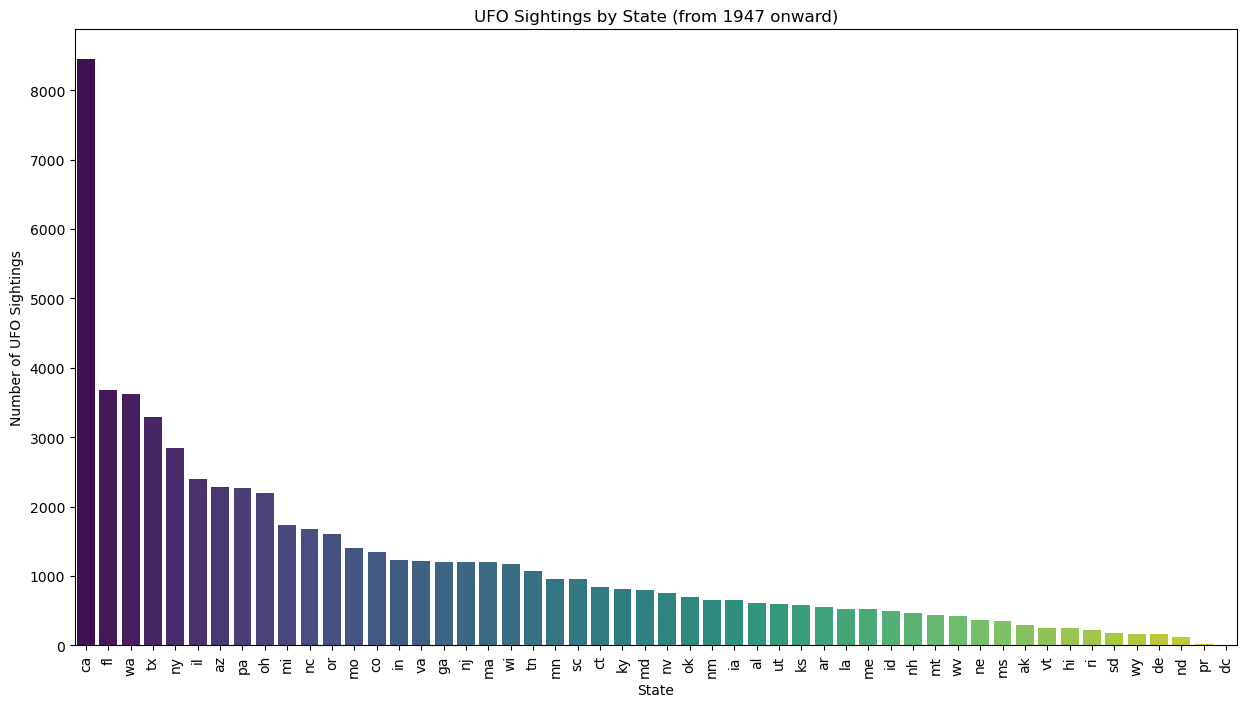

In [7]:
# 2. Bar Chart: Sightings per State
state_counts = ufo_data['state'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('UFO Sightings by State (from 1947 onward)')
plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.xticks(rotation=90)
# Save the figure in the 'images' folder
plt.savefig('images/state_counts.png', format='png')
plt.show()

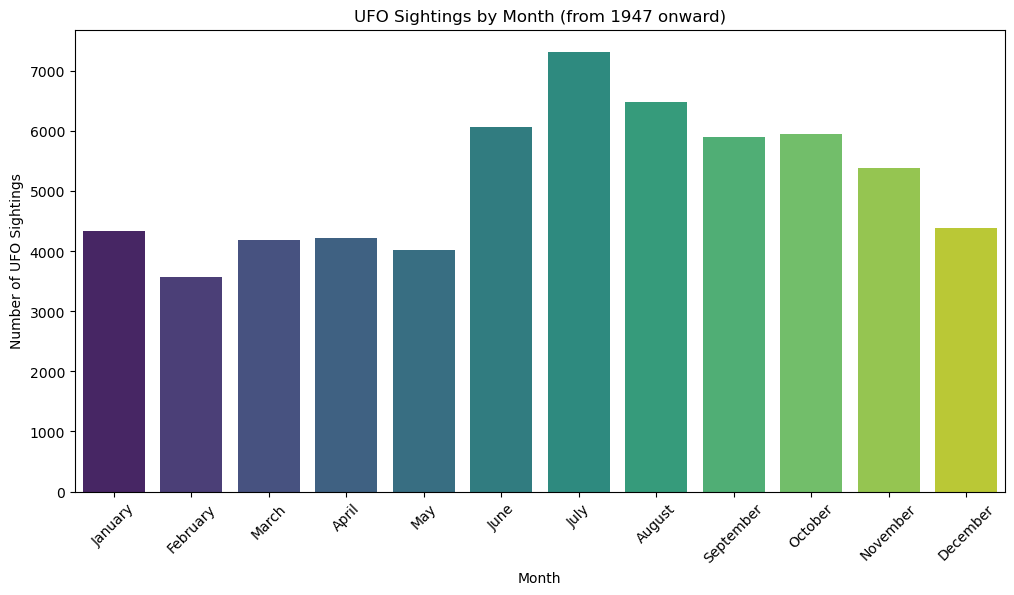

In [8]:
# 3. Bar Chart: Sightings per Month
ufo_data['month'] = ufo_data['datetime'].dt.month
month_counts = ufo_data['month'].value_counts().sort_index()
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_counts.index = [month_names[month - 1] for month in month_counts.index]
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.title('UFO Sightings by Month (from 1947 onward)')
plt.xlabel('Month')
plt.ylabel('Number of UFO Sightings')
plt.xticks(rotation=45)
# Save the figure in the 'images' folder
plt.savefig('images/sightings_per_month.png', format='png')
plt.show()

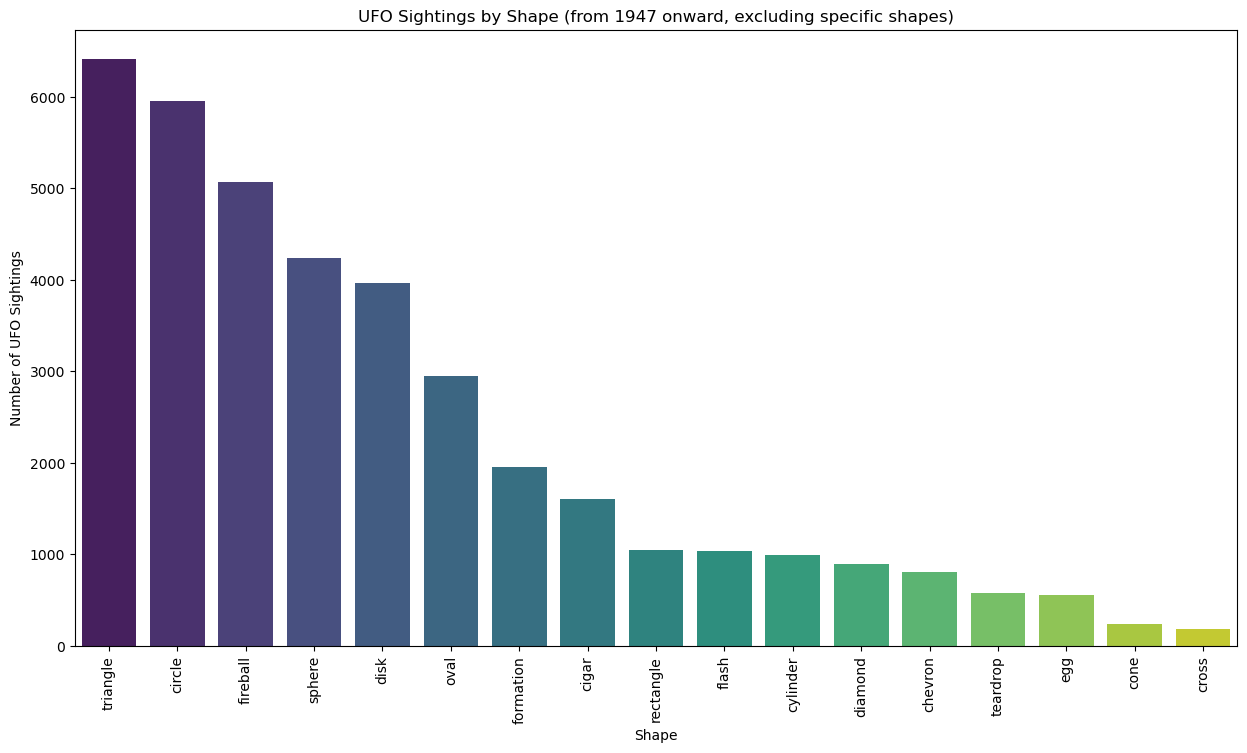

In [9]:
# 4. Bar Chart: Sightings by Shape (excluding certain shapes)
excluded_shapes = ["delta", "round", "pyramid", "flare", "hexagon", "changed", "unknown", "light", "other", "changing"]
shape_counts = ufo_data[~ufo_data['shape'].isin(excluded_shapes)]['shape'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette="viridis")
plt.title('UFO Sightings by Shape (from 1947 onward, excluding specific shapes)')
plt.xlabel('Shape')
plt.ylabel('Number of UFO Sightings')
plt.xticks(rotation=90)
# Save the figure in the 'images' folder
plt.savefig('images/sightings_per_shape.png', format='png')
plt.show()

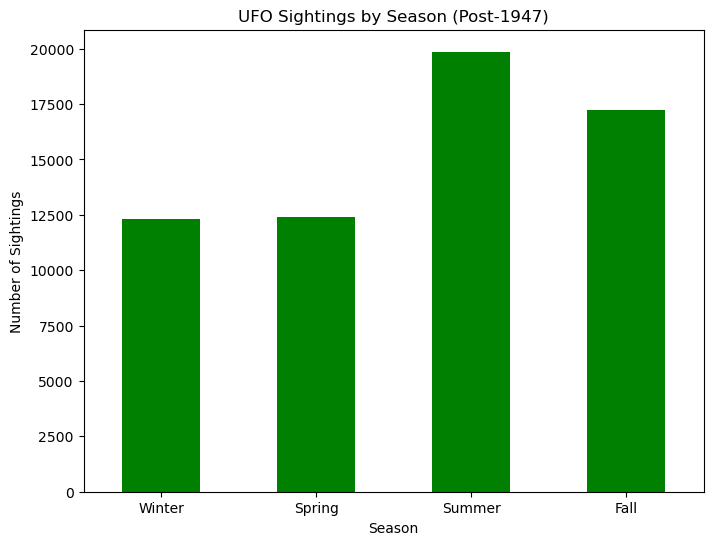

In [10]:
# Convert 'datetime' to datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

# Filter sightings after 1947
ufo_data_after_1947 = ufo_data[ufo_data['datetime'].dt.year > 1947].dropna(subset=['datetime'])

# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'season' column
ufo_data_after_1947['season'] = ufo_data_after_1947['datetime'].dt.month.apply(get_season)

# Count sightings by season
sightings_by_season = ufo_data_after_1947['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall']).fillna(0)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sightings_by_season.plot(kind='bar', color='green')
plt.title('UFO Sightings by Season (Post-1947)')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
# Save the figure in the 'images' folder
plt.savefig('images/sightings_by_season.png', format='png')
plt.show()

### Analysis


***1. Sightings per Year:***
   
* Trend: Sightings increased notably from the 1940s onward, peaking in the late 20th century and stabilizing with fluctuations in recent decades.
* Insight: This trend may correlate with cultural factors, increased awareness, and improved reporting methods over time.
    
***2. Sightings per State:***

* Hotspots: States like California, Texas, and Florida show the highest number of sightings, possibly due to larger populations, high levels of outdoor activity, and favorable visibility.
* Insight: These states' geographic and demographic characteristics may influence reporting frequencies.
    
***3. Sightings per Month:***

* Monthly Pattern: Sightings are more common in the summer months (June, July, August), likely due to longer daylight hours and increased outdoor activity.
* Insight: Seasonal weather patterns and outdoor activities may impact sighting visibility and reporting frequency.
    
***4. Sightings by Shape:***

* Common Shapes: Excluding ambiguous shapes, "circle," "triangle," and "disk" are the most frequently reported, aligning with classic UFO descriptions.
* Insight: Specific shapes are more memorable and likely resonate with popular UFO imagery, impacting witness recollections.
    
***5. Sightings by Season:***

* Seasonal Peaks: Sightings peak in summer, followed by fall, reflecting increased outdoor visibility and recreational activity in warmer months.
* Insight: Seasonal outdoor activities, favorable visibility, and mild weather conditions may contribute to more sightings.

**Summary**: UFO sightings have fluctuated over time, with noticeable monthly and seasonal patterns. Sightings are more frequent in summer and are concentrated in populous states. Popular UFO shapes suggest influence from cultural perceptions, and sightings have consistently reflected increased outdoor activity during warmer months.

### What are the average and most frequent durations of reported sightings, and do these vary by location?

In [11]:
# Ensure 'duration (seconds)' is numeric, handling any errors
ufo_data['duration (seconds)'] = pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce')

# Calculate the average duration per state
average_duration_by_state = ufo_data.groupby('state')['duration (seconds)'].mean().reset_index()
average_duration_by_state.columns = ['state', 'average_duration']

# Calculate the most frequent duration (mode) per state
mode_duration_by_state = ufo_data.groupby('state')['duration (seconds)'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()
mode_duration_by_state.columns = ['state', 'most_frequent_duration']

# Merge the average and mode data
duration_stats_by_state = pd.merge(average_duration_by_state, mode_duration_by_state, on='state')

In [12]:
# Optional: Display in tabular form in the notebook
duration_stats_by_state

state  average_duration  most_frequent_duration
0     ak        795.501706                   300.0
1     al        715.065147                   300.0
2     ar        677.237410                   300.0
3     az        747.620604                   300.0
4     ca        567.817266                   300.0
5     co        515.439956                   300.0
6     ct        622.445261                   300.0
7     dc        235.071429                     4.0
8     de        649.194444                   300.0
9     fl        570.616200                   300.0
10    ga        568.885382                   300.0
11    hi        714.288618                   300.0
12    ia        535.565586                   300.0
13    id        638.185484                   300.0
14    il        608.736184                   300.0
15    in        593.372632                   120.0
16    ks        574.331346                   300.0
17    ky        712.631868                   300.0
18    la        642.708885                   300.0
19    ma        562.424937                   120.0
20    md        653.995630                   300.0
21    me        682.725806                   300.0
22    mi        620.908756                   300.0
23    mn        699.278297                   300.0
24    mo        611.157582                   120.0
25    ms        702.564607                   300.0
26    mt        689.659142                   300.0
27    nc        586.422958                   300.0
28    nd        670.076271                   900.0
29    ne        583.797784                   300.0
30    nh        531.059574                   300.0
31    nj        526.495012                   120.0
32    nm        842.984985                    60.0
33    nv        687.209225                   300.0
34    ny        602.909363                   300.0
35    oh        578.412060                   300.0
36    ok        615.844863                   300.0
37    or        541.298076                   300.0
38    pa        592.735139                   300.0
39    pr        356.521739                    60.0
40    ri        490.232558                    60.0
41    sc        638.352029                   300.0
42    sd        551.154070                   120.0
43    tn        668.510561                   300.0
44    tx        610.154068                   300.0
45    ut        619.902500                   300.0
46    va        575.269294                   300.0
47    vt        341.715726                   300.0
48    wa        530.711561                   300.0
49    wi        604.423956                   300.0
50    wv        580.918224                   300.0
51    wy        622.030488                   120.0

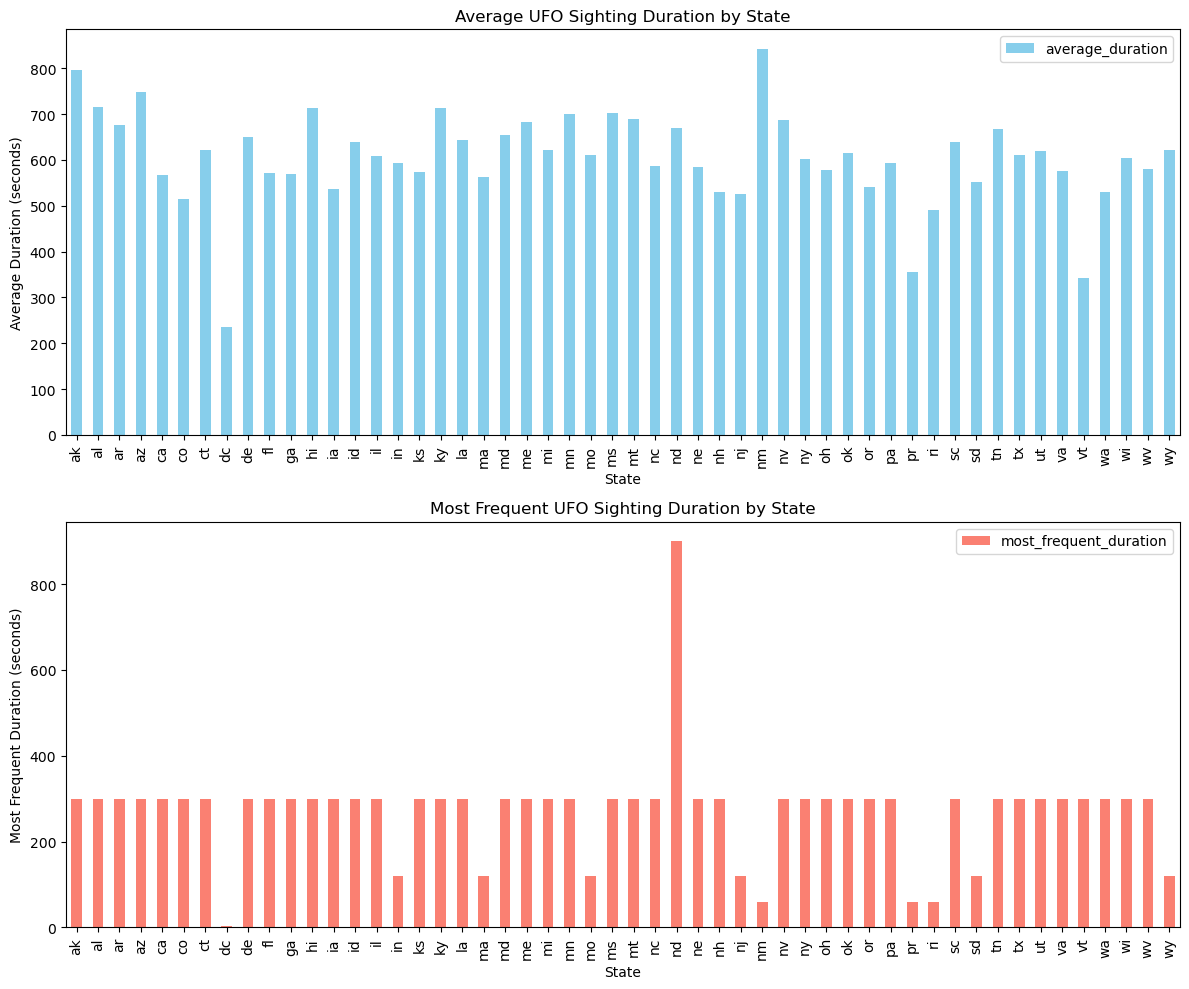

In [13]:
# Plotting average and most frequent durations by state as bar charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Average Duration Plot
duration_stats_by_state.plot(kind='bar', x='state', y='average_duration', ax=ax1, color='skyblue')
ax1.set_title('Average UFO Sighting Duration by State')
ax1.set_xlabel('State')
ax1.set_ylabel('Average Duration (seconds)')
ax1.set_xticklabels(duration_stats_by_state['state'], rotation=90)

# Most Frequent Duration Plot
duration_stats_by_state.plot(kind='bar', x='state', y='most_frequent_duration', ax=ax2, color='salmon')
ax2.set_title('Most Frequent UFO Sighting Duration by State')
ax2.set_xlabel('State')
ax2.set_ylabel('Most Frequent Duration (seconds)')
ax2.set_xticklabels(duration_stats_by_state['state'], rotation=90)

plt.tight_layout()
# Save the figure in the 'images' folder
plt.savefig('images/duration_stats_by_state.png', format='png')
plt.show()

### Anaylsis


* Average Duration: Sightings generally last 10-13 minutes across states, with higher averages in open, less populated areas like Alaska and Arizona. This suggests these areas offer fewer obstructions, allowing for longer observations.
* Most Frequent Duration: A common sighting duration is 5 minutes, possibly due to rounded estimates or quick observations. States with brief sightings might reflect conditions where visibility is limited.
* Patterns by Location: High-density states like California and Florida report frequent but brief sightings, potentially due to distractions or light pollution. Rural states with longer durations may benefit from clear skies and fewer interruptions.
* Overall: UFO sightings tend to be short but are consistent in duration nationwide. Rural settings and environmental factors appear to influence sighting duration, possibly making certain areas more conducive to longer observations.


### HeatMaps for UFO Sightings

In [15]:
# Ensure directory for HTML output exists
os.makedirs("HTML", exist_ok=True)

In [16]:
# Convert 'datetime' and 'date posted' to datetime objects if needed
if 'datetime' in ufo_data.columns:
    ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')
if 'date posted' in ufo_data.columns:
    ufo_data['date posted'] = pd.to_datetime(ufo_data['date posted'], errors='coerce')

# Filter data to include only sightings from 1947 onward
ufo_data = ufo_data[ufo_data['datetime'].dt.year >= 1947]

# Exclude specific shapes
excluded_shapes = ["delta", "round", "pyramid", "flare", "hexagon", "changed", "unknown", "light", "other", "changing"]
ufo_data = ufo_data[~ufo_data['shape'].isin(excluded_shapes)]

# Prepare the map plot using hvplot
ufo_map = ufo_data.hvplot.points(
    'longitude', 'latitude', geo=True, color='shape', size=7, 
    hover_cols=['date posted', 'latitude', 'longitude', 'duration (seconds)'],
    tiles='OSM', frame_width=800, frame_height=600
).opts(
    opts.Points(
        tools=['hover', 'tap'],  # Enables hover and tap (click) interactions
        size=7,
        color='shape',  # Color based on UFO shape
        width=800,
        height=600,
        title="UFO Sightings Heat Map (from 1947 onward, excluding specific shapes)",
        show_legend=True
    )
)

# Save the heat map to HTML for website use
pn.pane.HoloViews(ufo_map).save("HTML/ufo_map.html")

# Display the map with interactive features
ufo_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (shape,date posted,duration (seconds))

In [17]:
# Convert 'datetime' and 'date posted' to datetime objects if needed
if 'datetime' in ufo_data.columns:
    ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')
if 'date posted' in ufo_data.columns:
    ufo_data['date posted'] = pd.to_datetime(ufo_data['date posted'], errors='coerce')

# Filter data to include only sightings from 1947 onward
ufo_data = ufo_data[ufo_data['datetime'].dt.year >= 1947]

# Exclude specific shapes
excluded_shapes = ["delta", "round", "pyramid", "flare", "hexagon", "changed", "unknown", "light", "other", "changing"]
ufo_data = ufo_data[~ufo_data['shape'].isin(excluded_shapes)]

# Define color and marker mappings for each shape
color_mapping = {
    "circle": "blue",
    "triangle": "green",
    "disk": "purple",
    "sphere": "orange",
    "fireball": "red",
    "cylinder": "cyan",
    "chevron": "magenta",
}

marker_mapping = {
    "circle": "circle",
    "triangle": "triangle",
    "disk": "diamond",
    "sphere": "square",
    "fireball": "star",
    "cylinder": "hex",
    "chevron": "inverted_triangle",
}

# Create a dropdown widget for shape selection
shape_options = list(ufo_data['shape'].unique())
shape_select = pn.widgets.Select(name='Select Shape', options=shape_options, value=shape_options[0])

# Function to create the map based on selected shape
def create_shape_map(selected_shape):
    # Filter the data for the selected shape
    shape_data = ufo_data[ufo_data['shape'] == selected_shape]
    
    # Customize hover columns
    hover_cols = ['city', 'state', 'datetime', 'comments', 'longitude', 'latitude']
    
    # Create the map with only the selected shape, applying specific color and marker
    shape_map = shape_data.hvplot.points(
        'longitude', 'latitude', geo=True,
        color=color_mapping.get(selected_shape, 'gray'),
        marker=marker_mapping.get(selected_shape, 'circle'),  # Use specific marker for each shape
        size=10,  # Increase point size for better visibility
        hover_cols=hover_cols,  # Only show selected columns in hover
        tiles='OSM', frame_width=800, frame_height=600
    ).opts(
        opts.Points(
            tools=['hover', 'tap'],  # Enables hover and tap (click) interactions
            width=800,
            height=600,
            title=f"UFO Sightings for Shape: {selected_shape} (from 1947 onward)",
            show_legend=True
        )
    )
    
    return shape_map

# Save the initial shape map to HTML
initial_shape_map = create_shape_map(shape_options[0])
pn.pane.HoloViews(initial_shape_map).save("HTML/shape_map.html")

# Bind the map creation function to the shape selection widget
interactive_map = pn.bind(create_shape_map, selected_shape=shape_select)

# Layout the widget and map together
pn.Column(shape_select, interactive_map).servable()

Column
    [0] Select(options=['cylinder', 'circle', ...], value='cylinder')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [18]:
# Configure the simplified map plot
ufo_map_simple = ufo_data.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles="EsriNatGeo",
    frame_width=700,
    frame_height=500,
    color="shape",
    size=7
)

# Save `ufo_map_simple` directly without using widgets
pn.pane.HoloViews(ufo_map_simple).save("HTML/ufo_map_simple.html")

# Display the map plot
ufo_map_simple

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (shape)

In [19]:
## Define a mapping of shape names to marker symbols and colors
shape_marker_map = {
    "circle": ("circle", "blue"),
    "square": ("square", "green"),
    "triangle": ("triangle", "red"),
    "disk": ("circle_cross", "purple"),
    "cylinder": ("hex", "orange"),
    "sphere": ("dot", "pink"),
    "diamond": ("diamond", "yellow")
    # Add more shapes and corresponding markers and colors as needed
}

# Prepare overlays for each shape, assigning specific marker symbols and colors
overlays = []
for shape, (marker, color) in shape_marker_map.items():
    shape_data = ufo_data[ufo_data["shape"] == shape]  # Filter data for each shape
    plot = shape_data.hvplot.points(
        "longitude", "latitude",
        geo=True,
        tiles="EsriNatGeo",
        frame_width=800,
        frame_height=600,
        size=15,                # Increased point size for better visibility
        color=color,            # Use specific color for each shape
        marker=marker,
        label=shape             # Label for legend
    ).opts(legend_position='right')  # Place the legend on the right
    overlays.append(plot)

# Combine overlays into a single map without restricting bounds
ufo_map_with_shapes = gv.Overlay(overlays).opts(
    title="Global UFO Sightings Map by Shape",
    show_legend=True
)

# Save `ufo_map_with_shapes` directly as an HTML
pn.pane.HoloViews(ufo_map_with_shapes).save("HTML/ufo_map_with_shapes.html")

# Display the map
ufo_map_with_shapes


:Overlay
   .WMTS.I          :WMTS   [Longitude,Latitude]
   .Points.Circle   :Points   [longitude,latitude]
   .WMTS.II         :WMTS   [Longitude,Latitude]
   .Points.Square   :Points   [longitude,latitude]
   .WMTS.III        :WMTS   [Longitude,Latitude]
   .Points.Triangle :Points   [longitude,latitude]
   .WMTS.IV         :WMTS   [Longitude,Latitude]
   .Points.Disk     :Points   [longitude,latitude]
   .WMTS.V          :WMTS   [Longitude,Latitude]
   .Points.Cylinder :Points   [longitude,latitude]
   .WMTS.VI         :WMTS   [Longitude,Latitude]
   .Points.Sphere   :Points   [longitude,latitude]
   .WMTS.VII        :WMTS   [Longitude,Latitude]
   .Points.Diamond  :Points   [longitude,latitude]

In [25]:
# Convert 'datetime' to datetime objects if needed and extract the year
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')
ufo_data['year'] = ufo_data['datetime'].dt.year  # Extract year

# Drop rows with NaN values in the 'year' column
ufo_data = ufo_data.dropna(subset=['year'])

# Convert the 'year' column to integers
ufo_data['year'] = ufo_data['year'].astype(int)

# Define a mapping of shape names to marker symbols and colors
shape_marker_map = {
    "circle": ("circle", "blue"),
    "square": ("square", "green"),
    "triangle": ("triangle", "red"),
    "disk": ("circle_cross", "purple"),
    "cylinder": ("hex", "orange"),
    "sphere": ("dot", "pink"),
    "light": ("star", "cyan"),
    "diamond": ("diamond", "yellow")
}

# Create a slider widget for year selection
year_slider = pn.widgets.IntSlider(name='Year', start=ufo_data['year'].min(), end=ufo_data['year'].max(), step=1, value=ufo_data['year'].min())

# Function to update the map based on the selected year
def plot_ufo_sightings_by_year(year):
    # Filter data for the selected year
    year_data = ufo_data[ufo_data['year'] == year]
    
    # Prepare overlays for each shape with specific marker symbols and colors
    overlays = []
    for shape, (marker, color) in shape_marker_map.items():
        shape_data = year_data[year_data["shape"] == shape]  # Filter data for each shape
        if not shape_data.empty:  # Only plot if there's data for this shape in the selected year
            plot = shape_data.hvplot.points(
                "longitude", "latitude",
                geo=True,
                tiles="EsriNatGeo",
                frame_width=800,
                frame_height=600,
                size=15,
                color=color,
                marker=marker,
                label=shape
            ).opts(legend_position='right')
            overlays.append(plot)
    
    # Combine overlays into a single map
    return gv.Overlay(overlays).opts(title=f"UFO Sightings Map by Shape for {year}", show_legend=True)

# Generating initial year map to save
initial_year = year_slider.value
ufo_map_by_year = plot_ufo_sightings_by_year(initial_year)


# Wrap the year slider and interactive map in a layout and save with embedding enabled
year_slider_panel = pn.Column(year_slider, pn.bind(plot_ufo_sightings_by_year, year=year_slider))
year_slider_panel.save("HTML/ufo_map_with_year_slider_standalone.html", embed=True)

# Bind the function to the year slider
ufo_map_by_year = pn.bind(plot_ufo_sightings_by_year, year=year_slider)

# Display the slider and the map
pn.Column(year_slider, ufo_map_by_year).servable()

Column
    [0] IntSlider(end=2014, name='Year', start=1947, value=1947)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [26]:
# Convert 'datetime' to datetime objects and extract the year
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')
ufo_data['year'] = ufo_data['datetime'].dt.year

# Drop rows with NaN values in 'year', 'longitude', or 'latitude' columns
ufo_data = ufo_data.dropna(subset=['year', 'longitude', 'latitude'])

# Convert the 'year' column to integers to prevent slider issues
ufo_data['year'] = ufo_data['year'].astype(int)

# Define a mapping of shape names to marker symbols and colors
shape_marker_map = {
    "circle": ("circle", "blue"),
    "square": ("square", "green"),
    "triangle": ("triangle", "red"),
    "disk": ("circle_cross", "purple"),
    "cylinder": ("hex", "orange"),
    "sphere": ("dot", "pink"),
    "light": ("star", "cyan"),
    "diamond": ("diamond", "yellow")
}

# Create a Player widget for year playback
year_player = pn.widgets.Player(
    name='Year', start=ufo_data['year'].min(), end=ufo_data['year'].max(),
    step=1, value=ufo_data['year'].min(), width=800, loop_policy='loop'
)

# Function to update the map based on the selected year
def plot_ufo_sightings_by_year(year):
    # Filter data for the selected year
    year_data = ufo_data[ufo_data['year'] == year]
    
    # Add a base tile layer to ensure the map always displays
    base_map = gv.tile_sources.EsriNatGeo.opts(width=800, height=600)
    
    # Return just the base map if there's no data for the selected year
    if year_data.empty:
        return base_map.opts(title=f"No sightings for {year}")

    # Prepare overlays for each shape with specific marker symbols and colors
    overlays = [base_map]  # Start with the base map
    for shape, (marker, color) in shape_marker_map.items():
        shape_data = year_data[year_data["shape"] == shape]  # Filter data for each shape
        if not shape_data.empty:  # Only plot if there's data for this shape in the selected year
            plot = shape_data.hvplot.points(
                "longitude", "latitude",
                geo=True,
                size=15,
                color=color,
                marker=marker,
                label=shape
            ).opts(legend_position='right')
            overlays.append(plot)
    
    # Combine overlays into a single map
    return gv.Overlay(overlays).opts(title=f"UFO Sightings Map by Shape for {year}", show_legend=True)

# Saving with the Player widget
initial_year = year_player.value
ufo_map_with_loops = plot_ufo_sightings_by_year(initial_year)


# Wrap the year player and interactive map in a layout and save with embedding enabled
year_player_panel = pn.Column(year_player, pn.bind(plot_ufo_sightings_by_year, year=year_player))
year_player_panel.save("HTML/ufo_map_with_year_player_standalone.html", embed=True)

# Bind the function to the year player
ufo_map_by_year = pn.bind(plot_ufo_sightings_by_year, year=year_player)

# Display the player and the map
pn.Column(year_player, ufo_map_by_year).servable()

Column
    [0] Player(end=2014, loop_policy='loop', name='Year', start=1947, value=1947, value_throttled=1947, width=800)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)